In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
hotels = pd.read_excel('data/HotelCustomersDataset.xlsx')

In [4]:
hotels['date'] = (pd.to_datetime('2018-12-31') - pd.to_timedelta(hotels['DaysSinceCreation'], unit = 'D')).astype('datetime64[ns]')

# Assignment 1

In [17]:
daily_revenue = (hotels
                 .groupby('date')
                 .agg(
                    LodgingRevenue = pd.NamedAgg('LodgingRevenue', 'sum'),
                    OtherRevenue = pd.NamedAgg('OtherRevenue', 'sum')
                 )
                 )
monthly_revenue = daily_revenue.resample('M').sum()

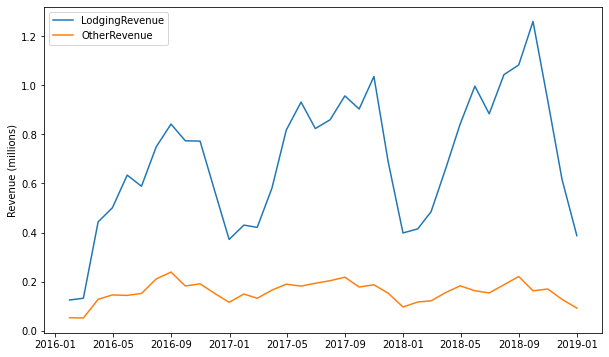

In [21]:
fig, ax = plt.subplots(figsize = (10 ,6))

ax.plot(monthly_revenue.index, monthly_revenue['LodgingRevenue'] / 1_000_000)
ax.plot(monthly_revenue.index, monthly_revenue['OtherRevenue'] / 1_000_000)

ax.set_ylabel('Revenue (millions)')


ax.legend(monthly_revenue.columns)

plt.show()

# Assignment  2

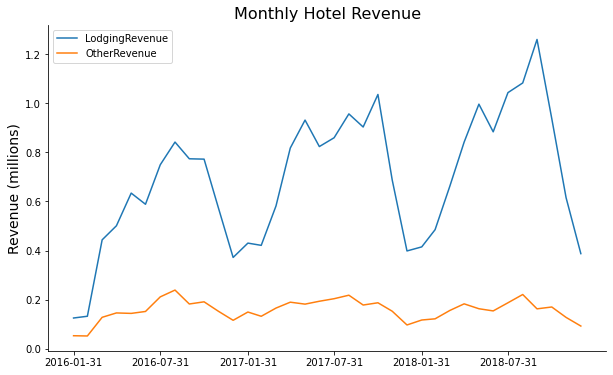

In [25]:
fig, ax = plt.subplots(figsize = (10 ,6))

ax.plot(monthly_revenue.index, monthly_revenue['LodgingRevenue'] / 1_000_000)
ax.plot(monthly_revenue.index, monthly_revenue['OtherRevenue'] / 1_000_000)

ax.set_title('Monthly Hotel Revenue', fontsize = 16)
ax.set_ylabel('Revenue (millions)', fontsize = 14)

ax.set_xticks(monthly_revenue.index[::6])

ax.legend(monthly_revenue.columns)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

# Assignment 3

In [27]:
room_nights = (hotels
               .groupby('date')
               .agg(
                    RoomNights = pd.NamedAgg('RoomNights', 'sum'),
                    BookingsCanceled = pd.NamedAgg("BookingsCanceled", 'sum')
               )
               )

quarterly_bookings = room_nights.resample("Q").sum()

In [28]:
quarterly_bookings.head()

,RoomNights,BookingsCanceled
date,,
2016-03-31,8464,15
2016-06-30,15535,26
2016-09-30,19517,27
2016-12-31,15404,17
2017-03-31,15206,12


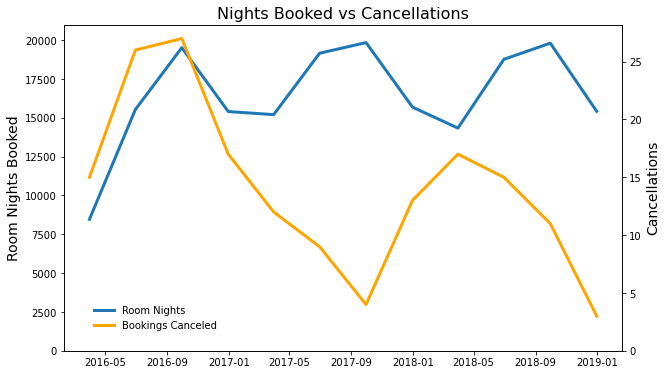

In [36]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.plot(
    quarterly_bookings.index,
    quarterly_bookings['RoomNights'],
    label = 'Room Nights',
    linewidth = 3
)

ax.set_title('Nights Booked vs Cancellations', fontsize = 16)
ax.set_ylabel('Room Nights Booked', fontsize = 14)
ax.set_ylim(0, 21000)

ax2 = ax.twinx()

ax2.plot(
    quarterly_bookings.index,
    quarterly_bookings['BookingsCanceled'],
    label = 'Bookings Canceled',
    color = 'orange',
    linewidth = 3
)

ax2.set_ylabel('Cancellations', fontsize = 14)
ax2.set_ylim(0)

fig.legend(bbox_to_anchor = (.35, .25), frameon = False)

plt.show()

## Assignment bar chart

In [6]:
countries = (
    hotels
    .groupby('Nationality')
    .agg(
        RoomNights = pd.NamedAgg('RoomNights', 'sum'),
        LodgingRevenue = pd.NamedAgg('LodgingRevenue', 'sum')
    )
    .sort_values('RoomNights', ascending=False)
    .iloc[:10]
)

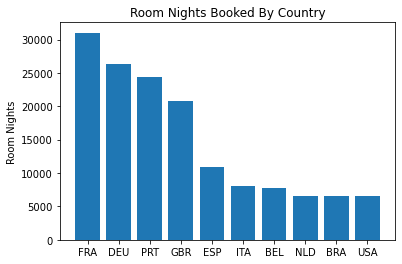

In [7]:
fig, ax = plt.subplots()

ax.bar(countries.index, countries['RoomNights'])

ax.set_title('Room Nights Booked By Country')
ax.set_ylabel('Room Nights')

plt.show()

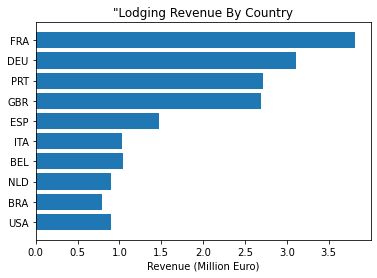

In [10]:
fig, ax = plt.subplots()

ax.barh(
    countries.index[::-1],
    countries['LodgingRevenue'].iloc[::-1] / 1_000_000
)

ax.set_title('"Lodging Revenue By Country')
ax.set_xlabel('Revenue (Million Euro)')

plt.show()

# Advanced bar charts

In [8]:
import numpy as np

In [7]:
countries = ['FRA', 'DEU', 'PRT', 'GBR', 'ESP']

countries_subset = (
    hotels
    .loc[hotels['Nationality'].isin(countries)]
    .groupby('Nationality')
    .agg({'LodgingRevenue':'sum', 'OtherRevenue':'sum'})
    .sort_values('LodgingRevenue', ascending = False)
)

countries_subset.head()

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,3809315.59,1033166.30
DEU,3113382.55,725541.53
PRT,2715008.72,665634.58
GBR,2693123.61,591212.77
ESP,1475909.33,319840.82


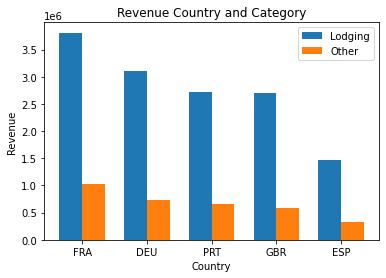

In [9]:
fig, ax = plt.subplots()

x = np.arange(0, len(countries))
width = 0.35

ax.bar(x - width/2, countries_subset['LodgingRevenue'], width, label = 'Lodging')
ax.bar(x + width/2, countries_subset['OtherRevenue'], width, label = 'Other')

ax.set_title('Revenue Country and Category')
ax.set_ylabel('Revenue')
ax.set_xlabel('Country')

ax.legend()

plt.xticks(range(len(countries)), countries)

plt.show()

In [8]:
countries_subset_pcts = countries_subset.apply(lambda x: x * 100 / sum(x), axis = 1)

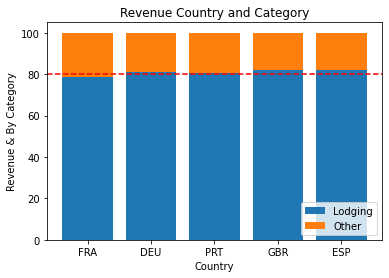

In [12]:
fig, ax = plt.subplots()

ax.bar(
    countries,
    countries_subset_pcts['LodgingRevenue'],
    label = 'Lodging'
)

ax.bar(
    countries,
    countries_subset_pcts['OtherRevenue'],
    label = 'Other',
    bottom = countries_subset_pcts['LodgingRevenue']
)

ax.axhline(80, 0, 1, c = 'red', ls = '--')

ax.set_title('Revenue Country and Category')
ax.set_ylabel('Revenue & By Category')
ax.set_xlabel('Country')

ax.legend(loc = 'lower right')

plt.show()

# Assignment pie charts

In [5]:
country_rev = (
    hotels
    .groupby('Nationality')
    .agg({'LodgingRevenue':'sum'})
    .sort_values('LodgingRevenue', ascending=False)
)

country_rev

,LodgingRevenue
Nationality,
FRA,3809315.59
DEU,3113382.55
PRT,2715008.72
GBR,2693123.61
ESP,1475909.33
...,...
PNG,0.00
FJI,0.00
NRU,0.00


In [9]:
countries_subset_pcts

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,78.664529,21.335471
DEU,81.100394,18.899606
PRT,80.310417,19.689583
GBR,81.999019,18.000981
ESP,82.189013,17.810987


In [12]:
pie_data = (
    pd.concat([country_rev.iloc[:5],
              pd.DataFrame({'LodgingRevenue': country_rev.iloc[5:, 0].sum()}, index=['OTH'])])
).iloc[::-1]

In [13]:
pie_data

,LodgingRevenue
OTH,11170126.66
ESP,1475909.33
GBR,2693123.61
PRT,2715008.72
DEU,3113382.55
FRA,3809315.59


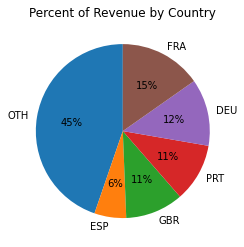

In [15]:
fig, ax = plt.subplots()

ax.pie(pie_data['LodgingRevenue'],
       startangle=90,
       labels=pie_data.index,
       autopct='%.0f%%')

ax.set_title('Percent of Revenue by Country')

plt.show()

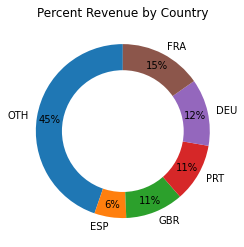

In [16]:
fig, ax = plt.subplots()

ax.pie(pie_data['LodgingRevenue'],
       startangle=90,
       labels=pie_data.index,
       autopct='%.0f%%',
       pctdistance=.85)

hole = plt.Circle((0,0), 0.7, fc = 'white')
fig = plt.gcf()

fig.gca().add_artist(hole)

ax.set_title('Percent Revenue by Country')

plt.show()